In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from scipy.stats import gaussian_kde
from matplotlib.ticker import LinearLocator

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
data_dir = join(root_data_dir, "Completeness")
comp_path = join(data_dir, "completeness.hdf5")
spectral_dir = join(root_data_dir, "Spectral-Class")

In [3]:
comp_raw = vaex.open(comp_path)
comp_raw

#,comp,JK,JK_low,JK_high,J,J_low,J_high
0,0.0,-0.95,-1.0,-0.9,4.095000000000001,4.0,4.19
1,0.0,-0.95,-1.0,-0.9,4.285,4.19,4.38
2,0.0,-0.95,-1.0,-0.9,4.475,4.38,4.57
3,0.0,-0.95,-1.0,-0.9,4.665,4.57,4.76
4,0.0,-0.95,-1.0,-0.9,4.855,4.76,4.95
...,...,...,...,...,...,...,...
"1,495",9.701830412004398e-05,1.9500000000000002,1.9000000000000004,2.0,12.645,12.55,12.74
"1,496",0.00011669292257424587,1.9500000000000002,1.9000000000000004,2.0,12.835,12.74,12.93
"1,497",0.00010288330461174412,1.9500000000000002,1.9000000000000004,2.0,13.025,12.93,13.120000000000001
"1,498",2.3039351211869873e-05,1.9500000000000002,1.9000000000000004,2.0,13.215,13.120000000000001,13.31


In [4]:
J = comp_raw.J.to_numpy()
J = np.unique(J)

eJ = comp_raw.J_low.to_numpy()
eJ = np.unique(eJ)
eJ = np.append(eJ, comp_raw.J_high.to_numpy()[-1])

JK = comp_raw.JK.to_numpy()
JK = np.unique(JK)

eJK = comp_raw.JK_low.to_numpy()
eJK = np.unique(eJK)
eJK = np.append(eJK, comp_raw.JK_high.to_numpy()[-1])

comp = np.zeros((len(J), len(JK)))
for i in range(len(J)):
    comp[i] = comp_raw[comp_raw.J == J[i]].comp.to_numpy()
comp

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.11349718e-04, 4.00753416e-05, 1.02883305e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.83311794e-05, 7.17463051e-05, 2.30393512e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.52930425e-05, 4.67792487e-05, 2.03359499e-05]])

Text(0, 0.5, 'J')

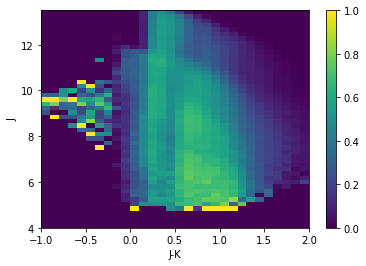

In [5]:
plt.imshow(comp, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto")
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")


In [64]:
# from scipy.interpolate import bisplrep, bisplev
# jk, j = np.meshgrid(JK, J)
# tck = bisplrep(jk.flatten(), j.flatten(), comp.flatten())
# # return 0 if the result is negative
# comp_interp = lambda jk, j: np.maximum(bisplev(jk, j, tck), 0)

In [6]:
# jk, j = np.meshgrid(JK, J)
# comp_interp_ = interpolate.interp2d(jk, j, comp, kind='linear', fill_value=0)
# # return 0 if the result is negative
# comp_interp = lambda jk, j: np.maximum(comp_interp_(jk, j), 0)

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=39,43 m=1500 fp=0.037590 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [7]:
df_AG = vaex.open(join(spectral_dir, "thin-AG-extended-filtered.hdf5"))
df_AG

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

In [8]:
# estimate J-K and M_J density for A by using gausian kernel density estimation
jk = df_AG["JK"].to_numpy()
mj = df_AG["M_J"].to_numpy()
djk = np.max(jk) - np.min(jk)
dmj = np.max(mj) - np.min(mj)
m = 0.1
jk_grid, mj_grid = np.mgrid[jk.min()-djk*m:jk.max()+djk*m:101j, mj.min()-dmj*m:mj.max()+dmj*m:100j]
positions = np.vstack([jk_grid.ravel(), mj_grid.ravel()])
values = np.vstack([jk, mj])
kernel_A = gaussian_kde(values)
dummy_kernel = np.rot90(kernel_A(positions).reshape(jk_grid.shape))
dummy_kernel.shape

(100, 101)

In [9]:
jks = jk_grid[:, 0]
mjs = mj_grid[0]
Djk = jks[1] - jks[0]
Dmj = mjs[1] - mjs[0]

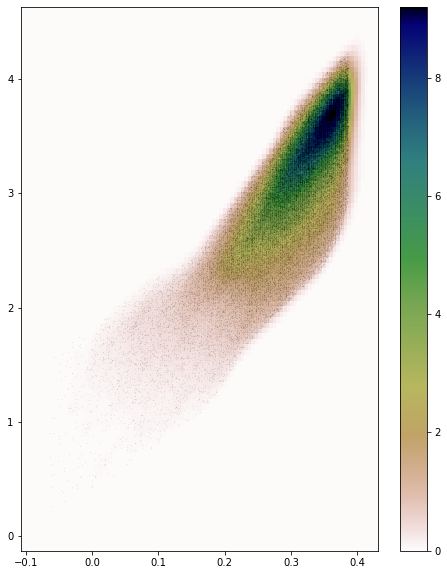

In [10]:
# plot the results

plt.figure(figsize=(8,10))
plt.imshow(dummy_kernel, cmap=plt.cm.gist_earth_r, extent=[jk.min()-djk*m, jk.max()+djk*m, mj.min()-dmj*m, mj.max()+dmj*m], aspect='auto')
plt.colorbar()
plt.plot(jk, mj, 'k.', markersize=0.1, alpha=0.5)
# plt.gca().invert_yaxis()
plt.show()

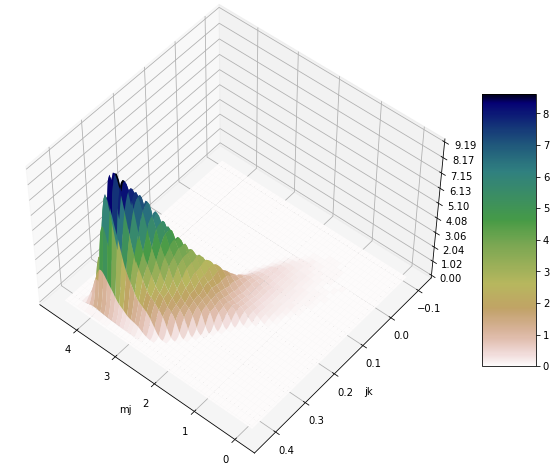

In [11]:
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

mj_grid_r = mj_grid[:,::-1]
# Plot the surface.
surf = ax.plot_surface(mj_grid_r, jk_grid , dummy_kernel.T, cmap=plt.cm.gist_earth_r)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=50., azim=130)
ax.set_ylabel("jk")
ax.set_xlabel("mj")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [12]:
# distance modulus
DMs = np.linspace(0, 14, 200)

In [13]:
comDM = np.zeros((len(DMs), len(jks)))
print("from:", jks.min(), "to: ", jks.max())
# dummy_kernell = np.ones_like(dummy_kernel)
for k, jk_ in enumerate(jks):
    for j, DM in enumerate(DMs):
        comp_val = np.empty(len(mjs))
        for i, mj_ in enumerate(mjs[::-1]):
            comp_val[i] = dummy_kernel[i, k]*comp_interp(jk_, mj_+DM)*Dmj
            # comp_val[i] = dummy_kernel[i, k]*1*Djk*Dmj
        comDM[j, k] = comp_val.sum()
    print(round(jk_,4), end=" ")

from: -0.10790019035339356 to:  0.43089966773986815
-0.1079 -0.1025 -0.0971 -0.0917 -0.0863 -0.081 -0.0756 -0.0702 -0.0648 -0.0594 -0.054 -0.0486 -0.0432 -0.0379 -0.0325 -0.0271 -0.0217 -0.0163 -0.0109 -0.0055 -0.0001 0.0052 0.0106 0.016 0.0214 0.0268 0.0322 0.0376 0.043 0.0484 0.0537 0.0591 0.0645 0.0699 0.0753 0.0807 0.0861 0.0915 0.0968 0.1022 0.1076 0.113 0.1184 0.1238 0.1292 0.1346 0.1399 0.1453 0.1507 0.1561 0.1615 0.1669 0.1723 0.1777 0.1831 0.1884 0.1938 0.1992 0.2046 0.21 0.2154 0.2208 0.2262 0.2315 0.2369 0.2423 0.2477 0.2531 0.2585 0.2639 0.2693 0.2746 0.28 0.2854 0.2908 0.2962 0.3016 0.307 0.3124 0.3178 0.3231 0.3285 0.3339 0.3393 0.3447 0.3501 0.3555 0.3609 0.3662 0.3716 0.377 0.3824 0.3878 0.3932 0.3986 0.404 0.4093 0.4147 0.4201 0.4255 0.4309 

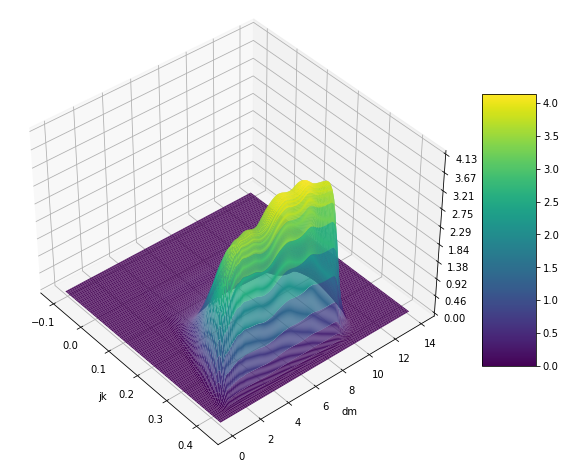

In [14]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

jkS, dmS = np.meshgrid(jk_grid[:, 0], DMs) 

# Plot the surface.
surf = ax.plot_surface(jkS, dmS, comDM, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=40., azim=-40)
ax.set_xlabel("jk")
ax.set_ylabel("dm")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

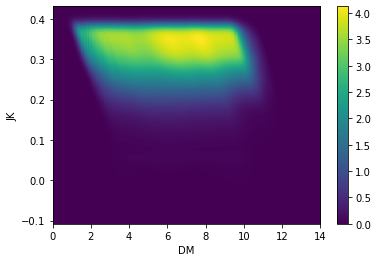

In [15]:
plt.figure()
plt.imshow(comDM.T, origin="lower", extent=[DMs.min(), DMs.max(), jks.min(), jks.max()], aspect="auto")
plt.colorbar()
plt.xlabel("DM")
plt.ylabel("JK")
plt.show()

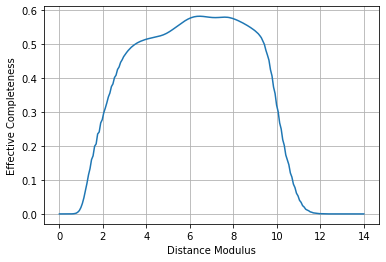

In [16]:
plt.plot(DMs, np.sum(comDM, axis=1)*Djk)
plt.xlabel("Distance Modulus")
plt.ylabel("Effective Completeness")
plt.grid()
plt.show()

In [17]:
df_comp = []
N = comDM.shape[0]
for i, jks_ in enumerate(jks):
    df_new = vaex.from_dict({
        "comp_per_jk": comDM[:, i], 
        "JK": np.repeat(jks_, N),
        "DM": DMs, 
      })
    if len(df_comp) == 0:
        df_comp = df_new
    else:
        df_comp = df_comp.concat(df_new)
df_comp

#,comp_per_jk,JK,DM
0,0.0,-0.10790019035339356,0.0
1,0.0,-0.10790019035339356,0.07035175879396985
2,0.0,-0.10790019035339356,0.1407035175879397
3,0.0,-0.10790019035339356,0.21105527638190955
4,0.0,-0.10790019035339356,0.2814070351758794
...,...,...,...
"20,195",0.0,0.43089966773986815,13.71859296482412
"20,196",0.0,0.43089966773986815,13.78894472361809
"20,197",0.0,0.43089966773986815,13.859296482412061
"20,198",0.0,0.43089966773986815,13.92964824120603


In [18]:
df_comp.export(join(data_dir, "comp-AG-extended-per-jk.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.08s =  0.0m =  0.0h
 

# tes-tes

In [11]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import load_spectral_types

In [12]:
df_s = load_spectral_types()
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [15]:
# AG
JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2
print(JK_lower, JK_upper)

mask = ((df_AG['JK'] > JK_lower)*(df_AG['JK'] < JK_upper))

df_A = df_AG[mask].extract()
df_A

-0.019000000000000003 0.1355


#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,3.8254456761506193,0.22476610161241525,6.778,6.789,1179504642045708288,23.411077,-20.403366208080733,0.044695366,-11.47959840447934,0.03801801,5.939178249818112,0.043899264,6.976698,6.9980636,6.9155016,0.14129820938604887,1.074330975824895,172.0854,168.7799,174.0965,0.0646,0.0449,0.1075,A,--,-12.202678680419922,0.39091944694519043,gaia,8974.4521484375,96.7978515625,233.56640625,0.0,gspphot,3.8201000690460205,0.015000104904174805,0.027499914169311523,0.0,gspphot,-0.7901999950408936,0.000500023365020752,0.000800013542175293,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.011000156,0.6466316766929028,168.37346143477427,148.04601583788326,80.19974881542109,-20.936184280541653,10.476388686965372,0.0402312046303834,0.04271410841986283,8.361103217896625,-16.708963650452247,0.07057941492206544,-0.12760927054966362,-6.74690401688393,0.34536453268010003,-13.164068527049366,0.19627227867768476,-15.385973855402652,0.19514547137768054,-14.68856613076485,0.12932586094177323,0.3687524188326675,1.7739436187545168,-14.68856613076485,-15.385973855402652,0.5030959831160704,5.1876587502846005e-06,5.027871935965675e-07,3.68050874454018e-09,0.09691986651376867,136.6080692899923,True,False,False
1,3.8321031822224745,0.9428851210177684,5.756,5.756,1606779808402312320,25.12627,16.880257462956234,0.034558747,-18.611457456998412,0.03859951,8.827861130388591,0.036171746,5.8210897,5.813059,5.8017464,1.6435504519431967,0.9900832726717478,116.5335,115.9293,117.2894,0.0559,0.0501,0.0596,A,--,-5.330538749694824,0.34856030344963074,gaia,9723.53515625,48.7890625,33.62890625,0.0,gspphot,3.8282999992370605,0.0055999755859375,0.005199909210205078,0.0,gspphot,-0.9315999746322632,0.024399995803833008,0.031599998474121094,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.0,0.48527750560804517,113.27772211523012,94.70829391441427,62.14645115721585,-25.12251796756423,0.43420232468730197,0.03676149735073559,0.0365078273368128,0.23313903431636965,-13.489194427440284,0.019625644258220876,-0.05869014169945287,-4.328807623095386,0.291620228396079,-3.119362392148642,0.19192991805257364,-13.22676359729199,0.060174524102080115,4.091639375139113,0.1914697177766178,0.40938101141114763,1.8214669762219193,4.091639375139113,-13.22676359729199,2.9211923769046138,5.515682745982363e-06,4.886089944532117e-07,3.4959153474166916e-09,0.0885854058247124,139.7656824883559,True,False,False
2,1.380248138206116,-0.5771136596972211,7.674,7.547,4826523070009350272,19.154257,-14.358462866674769,0.02072869,-12.677541860162282,0.024982648,7.354059741136132,0.02169511,8.172318,8.300154,7.920537,4.124381132424657,-0.5817652501900803,136.425,135.8503,137.1581,0.001,0.0002,0.0042,A,--,-9.866425514221191,0.9750928282737732,gaia,7276.32763671875,2.19677734375,3.77978515625,0.0,gspphot,4.070000171661377,0.0034999847412109375,0.003799915313720703,0.0,gspphot,-0.6431000232696533,0.02619999647140503,0.05790001153945923,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.12699986,2.006635554196447,135.979314174773,-74.72058527786088,113.60989401973556,9.155533738993771,-16.82443834022378,0.024788273793118425,0.02096074411543612,-10.844056281808289,5.901125561991425,-0.03472664485929058,0.02362910

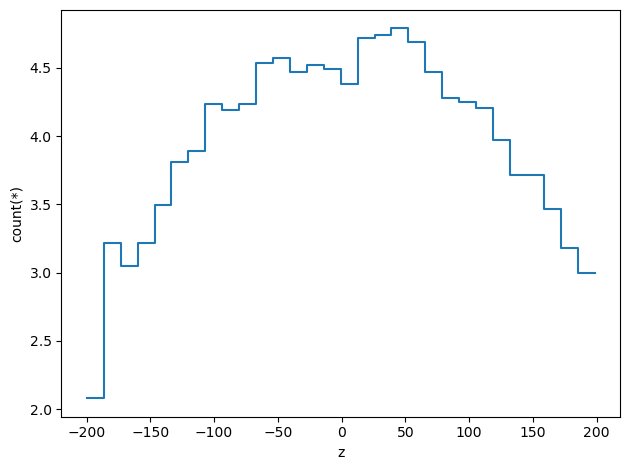

In [19]:
df_A.viz.histogram("z", shape=30, f="log")

In [20]:
# estimate J-K and M_J density for A by using gausian kernel density estimation
jk = df_A["JK"].to_numpy()
mj = df_A["M_J"].to_numpy()
djk = np.max(jk) - np.min(jk)
dmj = np.max(mj) - np.min(mj)
m = 0.1
jk_grid, mj_grid = np.mgrid[jk.min()-djk*m:jk.max()+djk*m:101j, mj.min()-dmj*m:mj.max()+dmj*m:100j]
positions = np.vstack([jk_grid.ravel(), mj_grid.ravel()])
values = np.vstack([jk, mj])
kernel_A = gaussian_kde(values)
dummy_kernel = np.rot90(kernel_A(positions).reshape(jk_grid.shape))
dummy_kernel.shape

(100, 101)

In [21]:
jks = jk_grid[:, 0]
mjs = mj_grid[0]
Djk = jks[1] - jks[0]
Dmj = mjs[1] - mjs[0]

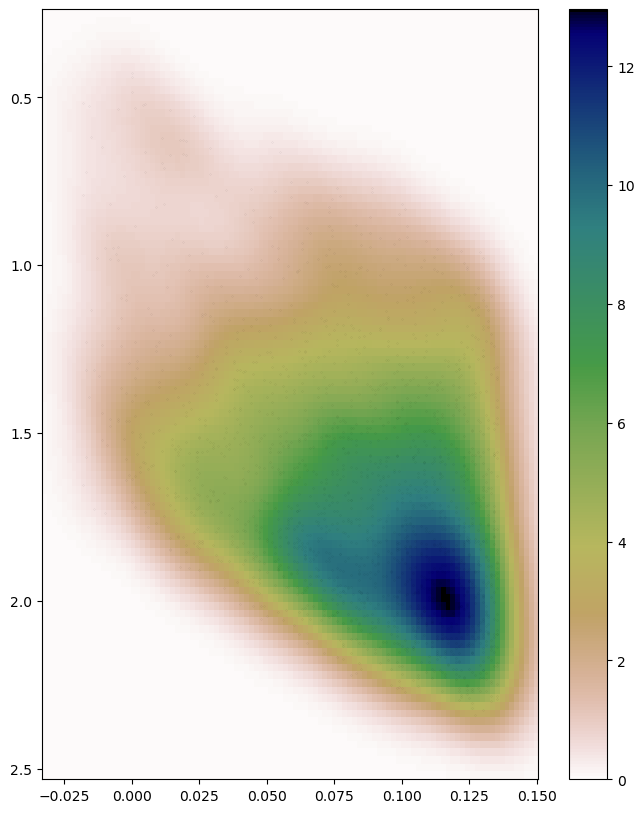

In [23]:
# plot the results

plt.figure(figsize=(8,10))
plt.imshow(dummy_kernel, cmap=plt.cm.gist_earth_r, extent=[jk.min()-djk*m, jk.max()+djk*m, mj.min()-dmj*m, mj.max()+dmj*m], aspect='auto')
plt.colorbar()
plt.plot(jk, mj, 'k.', markersize=0.1, alpha=0.5)
plt.gca().invert_yaxis()
plt.show()

In [24]:
# distance modulus
DMs = np.linspace(0, 14, 200)

In [25]:
comDM = np.zeros((len(DMs), len(jks)))
print("from:", jks.min(), "to: ", jks.max())
# dummy_kernell = np.ones_like(dummy_kernel)
for k, jk_ in enumerate(jks):
    for j, DM in enumerate(DMs):
        comp_val = np.empty(len(mjs))
        for i, mj_ in enumerate(mjs[::-1]):
            comp_val[i] = dummy_kernel[i, k]*comp_interp(jk_, mj_+DM)*Dmj
            # comp_val[i] = dummy_kernel[i, k]*1*Djk*Dmj
        comDM[j, k] = comp_val.sum()
    print(round(jk_,4), end=" ")

from: -0.033300161361694336 to:  0.1503002643585205
-0.0333 -0.0315 -0.0296 -0.0278 -0.026 -0.0241 -0.0223 -0.0204 -0.0186 -0.0168 -0.0149 -0.0131 -0.0113 -0.0094 -0.0076 -0.0058 -0.0039 -0.0021 -0.0003 0.0016 0.0034 0.0053 0.0071 0.0089 0.0108 0.0126 0.0144 0.0163 0.0181 0.0199 0.0218 0.0236 0.0255 0.0273 0.0291 0.031 0.0328 0.0346 0.0365 0.0383 0.0401 0.042 0.0438 0.0456 0.0475 0.0493 0.0512 0.053 0.0548 0.0567 0.0585 0.0603 0.0622 0.064 0.0658 0.0677 0.0695 0.0714 0.0732 0.075 0.0769 0.0787 0.0805 0.0824 0.0842 0.086 0.0879 0.0897 0.0915 0.0934 0.0952 0.0971 0.0989 0.1007 0.1026 0.1044 0.1062 0.1081 0.1099 0.1117 0.1136 0.1154 0.1173 0.1191 0.1209 0.1228 0.1246 0.1264 0.1283 0.1301 0.1319 0.1338 0.1356 0.1374 0.1393 0.1411 0.143 0.1448 0.1466 0.1485 0.1503 

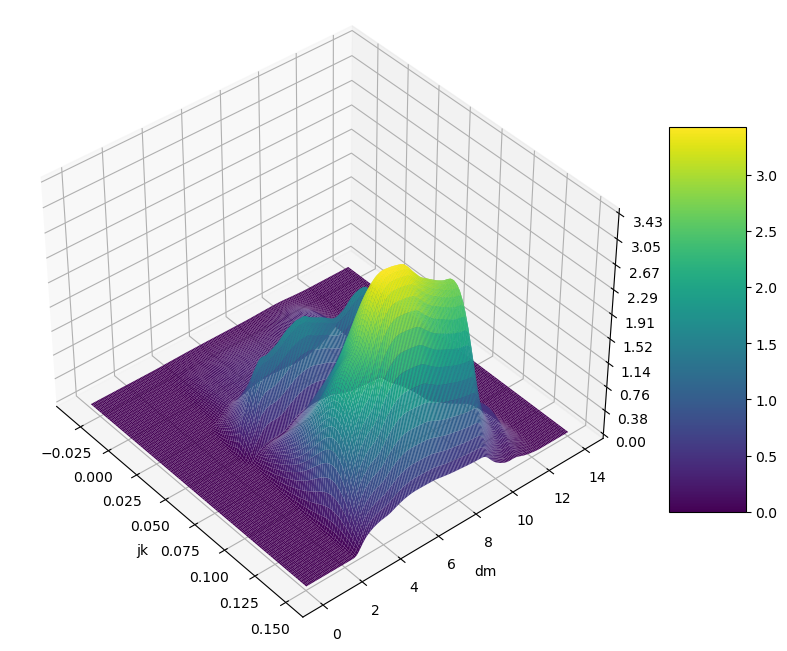

In [26]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

jkS, dmS = np.meshgrid(jk_grid[:, 0], DMs) 

# Plot the surface.
surf = ax.plot_surface(jkS, dmS, comDM, cmap='viridis', rstride=1, cstride=1,
                 edgecolor='none')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=40., azim=-40)
ax.set_xlabel("jk")
ax.set_ylabel("dm")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

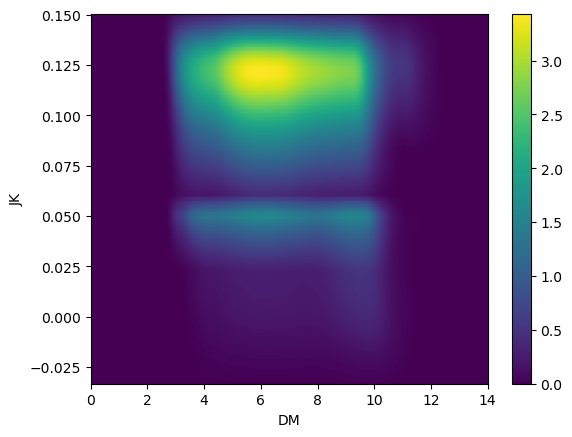

In [27]:
plt.figure()
plt.imshow(comDM.T, origin="lower", extent=[DMs.min(), DMs.max(), jks.min(), jks.max()], aspect="auto")
plt.colorbar()
plt.xlabel("DM")
plt.ylabel("JK")
plt.show()

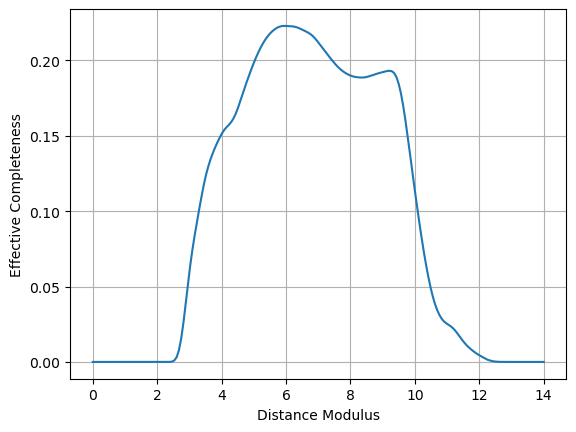

In [28]:
plt.plot(DMs, np.sum(comDM, axis=1)*Djk)
plt.xlabel("Distance Modulus")
plt.ylabel("Effective Completeness")
plt.grid()
plt.show()

In [32]:
df_new = vaex.from_dict({
        "comp": np.sum(comDM, axis=1)*Djk, 
        "DM": DMs, 
      })
df_new

#,comp,DM
0,0.0,0.0
1,0.0,0.07035175879396985
2,0.0,0.1407035175879397
3,0.0,0.21105527638190955
4,0.0,0.2814070351758794
...,...,...
195,0.0,13.71859296482412
196,0.0,13.78894472361809
197,0.0,13.859296482412061
198,0.0,13.92964824120603


In [34]:
df_new.export(join(data_dir, "comp-A.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 